#  Exercise:

# Task:EDA Analysis

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)

A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

4. Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

Missing Attribute Values: None


30=Age
64=Op_Year
1=axil_nodes
1.1=Surv_status

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#reading from the csv file
haberman=pd.read_csv("haberman.csv")
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
# how many data-points and features?   #305 rows and 4 columns
haberman.shape

(305, 4)

In [5]:
#(Q) What are the column names in our dataset?
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [6]:
#renaming the columns for better understanding
haberman.rename(columns = {'30':'Age','64':'Op_Year','1':'axil_nodes','1.1':'Surv_status'}, inplace = True)

In [8]:
#(Q) What are the new column names in our dataset?
haberman.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [9]:
haberman.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [10]:
#checking for any missing values or Null values
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age            305 non-null int64
Op_Year        305 non-null int64
axil_nodes     305 non-null int64
Surv_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observations
================
All columns are of numeric type and there are no NULL entries as for each column , we have 305 non-null entries.


Missing Attribute Values: None=======Confirmed

In [13]:
haberman.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations
================
1.Min year of patients is 30 years,Max year of patients is 83 years. Average year of patients is 52 years.   
2.Patients are operated between 1958 and 1969.  
3.Axil_nodes vary from 0 to 52 and average Axil_nodes is 4.  


In [14]:
haberman["axil_nodes"].unique()

array([ 3,  0,  2,  4, 10,  9, 30,  1,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [15]:
# checking number of unique values for axil_nodes
haberman["axil_nodes"].nunique()

31

In [18]:
#checking forunique values for Surv_status
haberman["Surv_status"].unique()

array([1, 2], dtype=int64)

In [19]:
haberman["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

We have an imbalanced dataset.  
1 = the patient survived 5 years or longer=224  
2 = the patient died within 5 year=81

In [20]:
TotalPatients=len(haberman["Surv_status"])
SurvivalCount=len(haberman[haberman["Surv_status"]==1])

print(" Total patients under observation: {},\n Total patients survived : {},\n Survival rate for 5 years or longer : {}".format(TotalPatients,SurvivalCount,(SurvivalCount/TotalPatients)))

 Total patients under observation: 305,
 Total patients survived : 224,
 Survival rate for 5 years or longer : 0.7344262295081967


# Performing Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

# Pair Plot

In [21]:
haberman.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

C:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


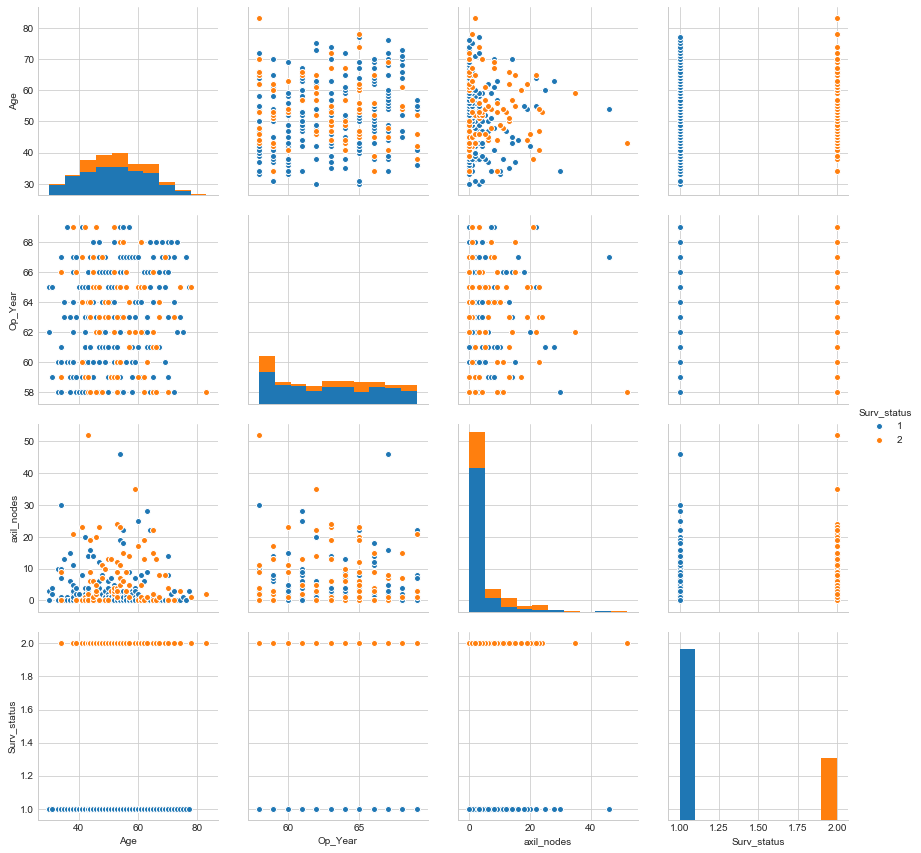

In [22]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status", size=3);
plt.show()

 We are not able to find any conclusion from the pair plots as for all features,we are getting overlapping results.

# Scatter Plot

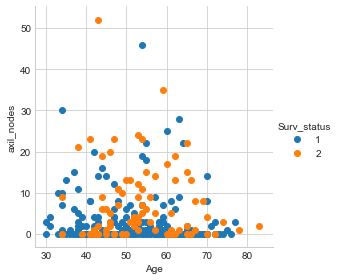

In [23]:
# 2-D Scatter plot with color-coding for each dependent class(Surv_status).

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.show();

#  Histogram

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


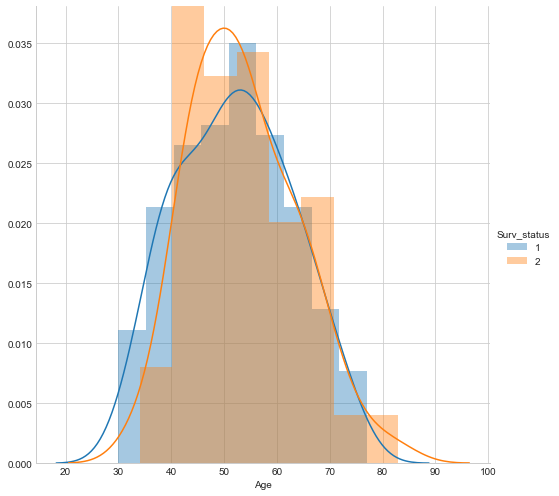

In [24]:
sns.FacetGrid(haberman,hue="Surv_status",size=7).map(sns.distplot,"Age").add_legend()
plt.show()

# Observation
==========================

People who survived for more than 5 years, the frequency of the people in 50-55 years age((approx) is maximum.  

People who died within 5 years, the frequency of the people in 40-45 years age((approx) is maximum. 


1 = the patient survived 5 years or longer
2 = the patient died within 5 year

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


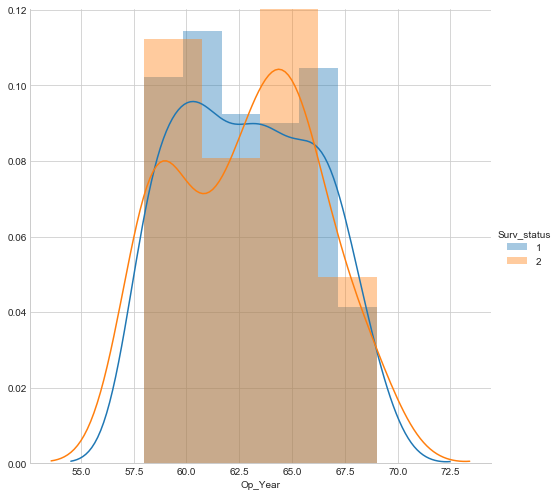

In [25]:
sns.FacetGrid(haberman,hue="Surv_status",size=7).map(sns.distplot,"Op_Year").add_legend()
plt.show()

# Observation
==========================

People who survived for more than 5 years, the frequency of the people operated between 1958 to 1961(approx) is maximum.

People who died within 5 years, the frequency of the people operated between 1963 to 1966(approx) is maximum.

1 = the patient survived 5 years or longer
2 = the patient died within 5 year

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


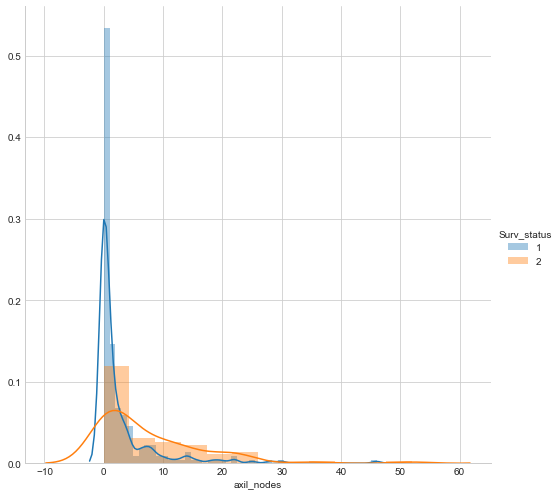

In [27]:
sns.FacetGrid(haberman,hue="Surv_status",size=7).map(sns.distplot,"axil_nodes").add_legend()
plt.show()

Observation
==========================

People who survived for more than 5 years, maximum people have 0(approx) axil_nodes..

People who died within 5 years, maximum people have 0-4(approx) axil_nodes.


1 = the patient survived 5 years or longer
2 = the patient died within 5 year

# Performing Univaraite analysis(PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.

# PDF and CDF

In [28]:
Survived=haberman[haberman["Surv_status"]==1]
Dead=haberman[haberman["Surv_status"]==2]

In [29]:
#Plot CDF of Age for Survived

counts, bin_edges = np.histogram(Survived['Age'], bins=10, density = False)
print("counts: ",counts)
print("length of counts :",len(counts))
print("****")
print("sum(counts) :",sum(counts))
#print("length of sum(counts) :",len(sum(counts)))
print("****")
pdf = counts/(sum(counts))
print("pdf :",pdf);
print("length of pdf :",len(pdf))
print("****")
print("bin_edges :",bin_edges)
print("length of bin_edges :",len(bin_edges))
print("****")
cdf = np.cumsum(pdf)
print("cdf :",cdf)
print("length of cdf :",len(cdf))


counts:  [11 24 28 21 37 37 21 25 14  6]
length of counts : 10
****
sum(counts) : 224
****
pdf : [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
length of pdf : 10
****
bin_edges : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
length of bin_edges : 11
****
cdf : [0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]
length of cdf : 10


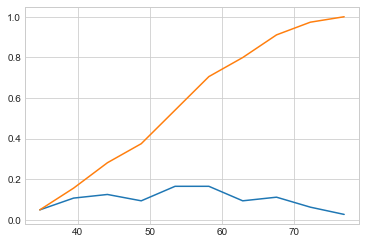

In [30]:
#length of pdf : 10 and length of bin_edges : 11.So we are considering bin_edges from 1
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# Observation
==========================

People who survived for more than 5 years, the frequency of the people in 50-55 years age((approx) is maximum.

In [31]:
#Plot CDF of Age for Dead

counts, bin_edges = np.histogram(Dead['Age'], bins=10, density = False)
print("counts: ",counts)
print("length of counts :",len(counts))
print("****")
print("sum(counts) :",sum(counts))
#print("length of sum(counts) :",len(sum(counts)))
print("****")
pdf = counts/(sum(counts))
print("pdf :",pdf);
print("length of pdf :",len(pdf))
print("****")
print("bin_edges :",bin_edges)
print("length of bin_edges :",len(bin_edges))
print("****")
cdf = np.cumsum(pdf)
print("cdf :",cdf)
print("length of cdf :",len(cdf))

counts:  [ 3 10 16 16 11 10  8  4  2  1]
length of counts : 10
****
sum(counts) : 81
****
pdf : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
length of pdf : 10
****
bin_edges : [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
length of bin_edges : 11
****
cdf : [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
length of cdf : 10


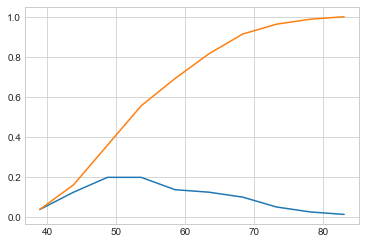

In [32]:
#length of pdf : 10 and length of bin_edges : 11.So we are considering bin_edges from 1
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# Observation
==========================

People who survived for more than 5 years, the frequency of the people in 50-55 years age((approx) is maximum.  

People who died within 5 years, the frequency of the people in 47-53 years age((approx) is maximum. 


1 = the patient survived 5 years or longer
2 = the patient died within 5 year

In [33]:
#Plot CDF of Op_Year for Survived

counts, bin_edges = np.histogram(Survived['Op_Year'], bins=10, density = False)
print("counts: ",counts)
print("length of counts :",len(counts))
print("****")
print("sum(counts) :",sum(counts))
#print("length of sum(counts) :",len(sum(counts)))
print("****")
pdf = counts/(sum(counts))
print("pdf :",pdf);
print("length of pdf :",len(pdf))
print("****")
print("bin_edges :",bin_edges)
print("length of bin_edges :",len(bin_edges))
print("****")
cdf = np.cumsum(pdf)
print("cdf :",cdf)
print("length of cdf :",len(cdf))


counts:  [42 24 23 16 22 22 15 22 21 17]
length of counts : 10
****
sum(counts) : 224
****
pdf : [0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
length of pdf : 10
****
bin_edges : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
length of bin_edges : 11
****
cdf : [0.1875     0.29464286 0.39732143 0.46875    0.56696429 0.66517857
 0.73214286 0.83035714 0.92410714 1.        ]
length of cdf : 10


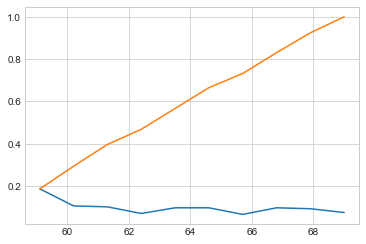

In [34]:
#length of pdf : 10 and length of bin_edges : 11.So we are considering bin_edges from 1
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# Observation
==========================

People who survived for more than 5 years, the frequency of the people operated between 1958 to 1961(approx) is maximum.



In [35]:
#Plot CDF of Op_Year for Dead

counts, bin_edges = np.histogram(Dead['Op_Year'], bins=10, density = False)
print("counts: ",counts)
print("length of counts :",len(counts))
print("****")
print("sum(counts) :",sum(counts))
#print("length of sum(counts) :",len(sum(counts)))
print("****")
pdf = counts/(sum(counts))
print("pdf :",pdf);
print("length of pdf :",len(pdf))
print("****")
print("bin_edges :",bin_edges)
print("length of bin_edges :",len(bin_edges))
print("****")
cdf = np.cumsum(pdf)
print("cdf :",cdf)
print("length of cdf :",len(cdf))

counts:  [21  4  3  7  8  8 13  6  4  7]
length of counts : 10
****
sum(counts) : 81
****
pdf : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
length of pdf : 10
****
bin_edges : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
length of bin_edges : 11
****
cdf : [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]
length of cdf : 10


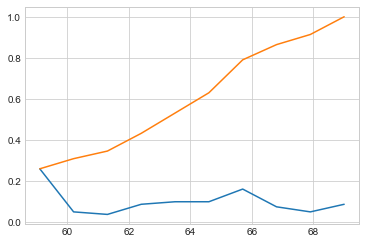

In [36]:
#length of pdf : 10 and length of bin_edges : 11.So we are considering bin_edges from 1
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

In [37]:
#Plot CDF of axil_nodes for Survived

counts, bin_edges = np.histogram(Survived['axil_nodes'], bins=10, density = False)
print("counts: ",counts)
print("length of counts :",len(counts))
print("****")
print("sum(counts) :",sum(counts))
#print("length of sum(counts) :",len(sum(counts)))
print("****")
pdf = counts/(sum(counts))
print("pdf :",pdf);
print("length of pdf :",len(pdf))
print("****")
print("bin_edges :",bin_edges)
print("length of bin_edges :",len(bin_edges))
print("****")
cdf = np.cumsum(pdf)
print("cdf :",cdf)
print("length of cdf :",len(cdf))


counts:  [187  18   5   6   4   1   2   0   0   1]
length of counts : 10
****
sum(counts) : 224
****
pdf : [0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
length of pdf : 10
****
bin_edges : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
length of bin_edges : 11
****
cdf : [0.83482143 0.91517857 0.9375     0.96428571 0.98214286 0.98660714
 0.99553571 0.99553571 0.99553571 1.        ]
length of cdf : 10


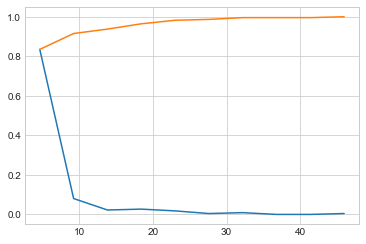

In [38]:
#length of pdf : 10 and length of bin_edges : 11.So we are considering bin_edges from 1
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

In [39]:
#Plot CDF of axil_nodes for Dead

counts, bin_edges = np.histogram(Dead['axil_nodes'], bins=10, density = False)
print("counts: ",counts)
print("length of counts :",len(counts))
print("****")
print("sum(counts) :",sum(counts))
#print("length of sum(counts) :",len(sum(counts)))
print("****")
pdf = counts/(sum(counts))
print("pdf :",pdf);
print("length of pdf :",len(pdf))
print("****")
print("bin_edges :",bin_edges)
print("length of bin_edges :",len(bin_edges))
print("****")
cdf = np.cumsum(pdf)
print("cdf :",cdf)
print("length of cdf :",len(cdf))


counts:  [46 12 11  4  6  0  1  0  0  1]
length of counts : 10
****
sum(counts) : 81
****
pdf : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
length of pdf : 10
****
bin_edges : [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
length of bin_edges : 11
****
cdf : [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]
length of cdf : 10


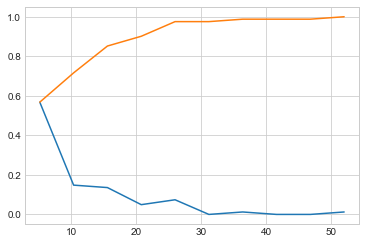

In [40]:
#length of pdf : 10 and length of bin_edges : 11.So we are considering bin_edges from 1
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# Mean, Variance and Std-dev

In [41]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Mean age of Survive :",np.mean(Survived['Age']))
print("Mean age of Death :",np.mean(Dead['Age']))
print("Mean of Operated year for Survived Person :",np.mean(Survived['Op_Year']))
print("Mean of Operated year for Dead Person :",np.mean(Dead['Op_Year']))
print("Mean number of axil noded for Survived Person :",np.mean(Survived['axil_nodes']))
print("Mean number of axil noded for Dead Person :",np.mean(Dead['axil_nodes']))

print("\nStd-dev:");
print("Standard Deviation for age of Survive :",np.std(Survived['Age']))
print("Standard Deviation for age of Death :",np.std(Dead['Age']))
print("Standard Deviation for Operated year for Survived Person :",np.std(Survived['Op_Year']))
print("Standard Deviation for Operated year for Dead Person :",np.std(Dead['Op_Year']))
print("Standard Deviation for axil noded for Survived Person :",np.std(Survived['axil_nodes']))
print("Standard Deviation for axil noded for Dead Person :",np.std(Dead['axil_nodes']))


Means:
Mean age of Survive : 52.11607142857143
Mean age of Death : 53.67901234567901
Mean of Operated year for Survived Person : 62.857142857142854
Mean of Operated year for Dead Person : 62.82716049382716
Mean number of axil noded for Survived Person : 2.799107142857143
Mean number of axil noded for Dead Person : 7.45679012345679

Std-dev:
Standard Deviation for age of Survive : 10.913004640364269
Standard Deviation for age of Death : 10.10418219303131
Standard Deviation for Operated year for Survived Person : 3.2220145175061514
Standard Deviation for Operated year for Dead Person : 3.3214236255207883
Standard Deviation for axil noded for Survived Person : 5.869092706952767
Standard Deviation for axil noded for Dead Person : 9.128776076761632


In [42]:
# Median, Percentile, Quantile, IQR, MAD

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median age of Survive :",np.median(Survived['Age']))
print("Median age of Death :",np.median(Dead['Age']))
print("Median of Operated year for Survived Person :",np.median(Survived['Op_Year']))
print("Median of Operated year for Dead Person :",np.median(Dead['Op_Year']))
print("Median number of axil noded for Survived Person :",np.median(Survived['axil_nodes']))
print("Median number of axil noded for Dead Person :",np.median(Dead['axil_nodes']))



print("\nQuantiles 0=0 percentile 1=25 percentile 2=50 percentile  3=75 percentile:")
print(np.percentile(Survived['Age'],np.arange(0, 100, 25)))
print(np.percentile(Dead['Age'],np.arange(0, 100, 25)))
print(np.percentile(Survived['Op_Year'], np.arange(0, 100, 25)))
print(np.percentile(Dead['Op_Year'], np.arange(0, 100, 25)))
print(np.percentile(Survived['axil_nodes'], np.arange(0, 100, 25)))
print(np.percentile(Dead['axil_nodes'], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
#np.percentile() takes care of sorting. You need not give a sorted array.
print(np.percentile(Survived['Age'],90))
print(np.percentile(Dead['Age'],90))
print(np.percentile(Survived['Op_Year'],90))
print(np.percentile(Dead['Op_Year'],90))
print(np.percentile(Survived['axil_nodes'],90))
print(np.percentile(Dead['axil_nodes'],90))

'''50% percentile means there are 50% points which has value less than 50th percentile.
Suppose 160 cm is 50th percentile of heights of students in a class. It means 50% of students are shorter than 160 cm.
Similarly if 75th percentile is 170 cm, 75% of students are shorter than 170 cm.

25% percentile=1st Quantile
50% percentile=2nd Quantile
75% percentile=3rd Quantile

IQR=Inter Quartile Range=75% percentile-25% percentile
'''

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Survived['Age']))
print(robust.mad(Dead['Age']))
print(robust.mad(Survived['Op_Year']))
print(robust.mad(Dead['Op_Year']))
print(robust.mad(Survived['axil_nodes']))
print(robust.mad(Dead['axil_nodes']))


Medians:
Median age of Survive : 52.0
Median age of Death : 53.0
Median of Operated year for Survived Person : 63.0
Median of Operated year for Dead Person : 63.0
Median number of axil noded for Survived Person : 0.0
Median number of axil noded for Dead Person : 4.0

Quantiles 0=0 percentile 1=25 percentile 2=50 percentile  3=75 percentile:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
67.0
67.0
67.0
67.0
8.0
20.0

Median Absolute Deviation
13.343419966550417
11.860817748044816
4.447806655516806
4.447806655516806
0.0
5.930408874022408


# Box plot and Whiskers


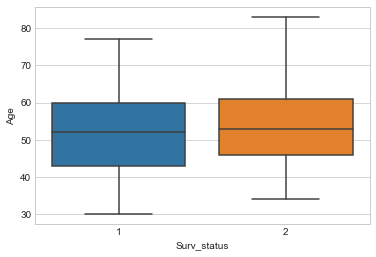

In [43]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.

sns.boxplot(x='Surv_status',y='Age', data=haberman)
plt.show()

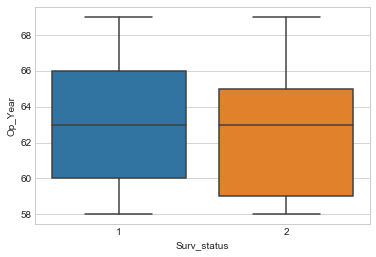

In [44]:
sns.boxplot(x='Surv_status',y='Op_Year', data=haberman)
plt.show()

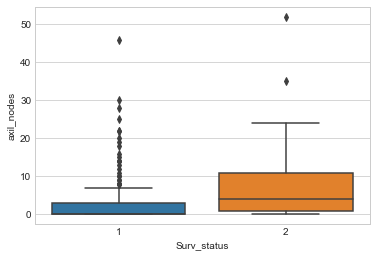

In [45]:
#Here we can see some outlier points
sns.boxplot(x='Surv_status',y='axil_nodes', data=haberman)
plt.show()

# Violin plots

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


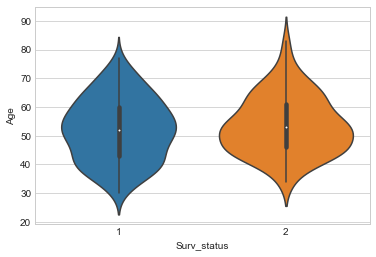

In [46]:
# A violin plot combines the benefits of the box plot and pdf 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='Surv_status',y='Age', data=haberman, size=8)
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


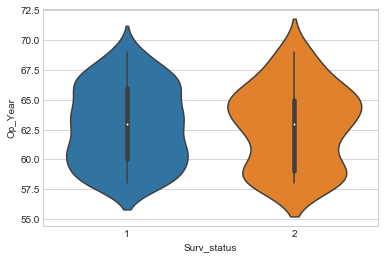

In [47]:
sns.violinplot(x='Surv_status',y='Op_Year', data=haberman, size=8)
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


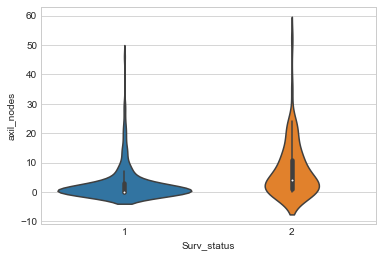

In [48]:
sns.violinplot(x='Surv_status',y='axil_nodes', data=haberman, size=8)
plt.show()

# Multivariate probability density, contour plot

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


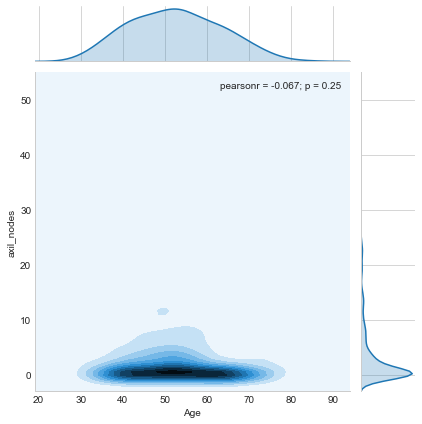

In [49]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="axil_nodes", data=haberman, kind="kde");
plt.show();

# Conclusions:
The Haberman's Survival Dataset is very imbalanced with 73.44% of patients Survived.

From the Dataset,it is almost impossible to separate features and draw conclusions.